In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
from dask.distributed import Client, LocalCluster
import dask.dataframe as df

In [4]:
dask_cluster = LocalCluster(n_workers=10, threads_per_worker=1)
dask_client = Client(dask_cluster)

In [5]:
dask_client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 10,Total memory: 31.16 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44773,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 31.16 GiB
Comm: tcp://127.0.0.1:34707,Total threads: 1
Dashboard: http://127.0.0.1:43649/status,Memory: 3.12 GiB
Nanny: tcp://127.0.0.1:42983,


# Combine the Kangyur and Tengyur

In [6]:
from cai_common.data import CorpusSplitType, KangyurLoader, TengyurLoader

In [7]:
kangyur_df = KangyurLoader().remove_new_lines().dataframe
tengyur_df = TengyurLoader().remove_new_lines().dataframe
kangyur_df['corpus'], tengyur_df['corpus'] = 'kangyur', 'tengyur'
corpora_df = kangyur_df.append(tengyur_df)

/home/eeisenst/miniconda3/envs/cai-base/lib/python3.10/site-packages/dask/dataframe/core.py:3082: FutureWarning: The frame.append method is deprecated and will be removed fromdask in a future version. Use dask.dataframe.concat instead.
  warnings.warn(


In [8]:
corpora_df = corpora_df[~(corpora_df.text == '')]

In [9]:
corpora_df.head(20)

,filename,volume_number,location,text,corpus
0,v076_pages.txt,76,0,༄༅། །མདོ་སྡེ་ཨཱཾཿ་ཞུགས་སོ།།,kangyur
1,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur
2,v076_pages.txt,76,2,པར་བླངས་ཏེ་གནས་པར་མ་བྱས་པས་ལུས་ཞིག་སྟེ་ཤི་བའི་...,kangyur
3,v076_pages.txt,76,3,བའི་ལས་དག་བྱེད་པ་ཡིན། །དམ་པ་མིན་པས་མི་རྟོགས་ཏེ...,kangyur
4,v076_pages.txt,76,4,ཚེ་དང་ལྡན་པ་མ་འགགས་པ་དང་། ཚེ་དང་ལྡན་པ་ཤཱ་རིའི་...,kangyur
5,v076_pages.txt,76,5,གསན་ནས་ཏིང་ངེ་འཛིན་དེ་ལས་བཞེངས་ཏེ་འདུན་ཁང་ག་ལ་...,kangyur
6,v076_pages.txt,76,6,ན། །དེ་ཕྱིར་བསོད་ནམས་དམ་པ་ཡིན། །ཞེས་གསུངས་ནས་ད...,kangyur
7,v076_pages.txt,76,7,མོའི་ལྷུམས་སུ་སྲས་ཞུགས་པ་གང་ལགས་པ་འདི་ནི་བསོད་...,kangyur
8,v076_pages.txt,76,8,དེ་ནས་རྒྱལ་པོས་བཙུན་མོ་འཁོར་དང་གྲོང་ཁྱེར་རྒྱ་ཆ...,kangyur
9,v076_pages.txt,76,9,ཏེ། དེའི་ངག་ཉན་ཅིང་སེམས་བཏུད་ནས་མདུན་དུ་འཁོད་ད...,kangyur


# Sanity check

In [10]:
corpora_df['is_doc_start'] = corpora_df.text.str.contains('༄')

In [11]:
corpora_df.is_doc_start.astype(int).sum().compute()

4353

In [12]:
doc_starts_df = corpora_df[corpora_df.is_doc_start].compute()
doc_starts_df

,filename,volume_number,location,text,corpus,is_doc_start
0,v076_pages.txt,76,0,༄༅། །མདོ་སྡེ་ཨཱཾཿ་ཞུགས་སོ།།,kangyur,True
1,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True
42,v076_pages.txt,76,42,འཇིག་རྟེན་དུ་ནི་འདི་གསུངས་སོ། །རྫུ་འཕྲུལ་རྒྱ་ཆ...,kangyur,True
61,v076_pages.txt,76,61,པོ་དང་། ས་འཛིན་དེ་གཉིས་ནི་དགེ་སློང་ཤཱ་རིའི་བུ་...,kangyur,True
98,v076_pages.txt,76,98,ཅན་སྙིང་པོ་གང་དག་དང་ཐབས་ཅིག་ཏུ་ངའི་ཐད་དུ་འོངས་...,kangyur,True
...,...,...,...,...,...,...
634,061_རྒྱུད་འགྲེལ།_ཨི.txt,61,F.1.b,༄༅༅། །དེ་ལྟར་འདོད་ཆགས་ལ་སོགས་པའི་གཉེན་པོར་གྱུར...,tengyur,True
1016,061_རྒྱུད་འགྲེལ།_ཨི.txt,61,F.192.b,དར་བ། །ལོ་ཙཱ་སྐྱེས་མཆོག་དེ་ཡི་དྲིན་ཡིན་གྲང་། །...,tengyur,True
1206,061_རྒྱུད་འགྲེལ།_ཨི.txt,61,F.287.b,མཛད་པ་རྫོགས་སོ།། །།ཞུ་ཆེན་གྱི་ལོ་ཙཱ་བ་དགེ་སློང...,tengyur,True
1257,061_རྒྱུད་འགྲེལ།_ཨི.txt,61,F.313.a,ཀྱི་བདག་ཉིད་ལ་སློབ་དཔོན་གྱིས་དབང་བསྐུར་བའི་ཕྱི...,tengyur,True


In [13]:
corpora_df.groupby(['corpus', 'volume_number']).is_doc_start.sum().compute()

corpus   volume_number
kangyur  76               14
         49                5
         23                2
         61               21
         80               15
                          ..
tengyur  169               3
         177               1
         61                4
         108               8
         188               1
Name: is_doc_start, Length: 316, dtype: int64

# Save as BERT-like dataset

## Split into sections

In [14]:
corpora_df["split_text"] = corpora_df \
    .text \
    .str.replace(' ', '_ ') \
    .str.split(' ')

In [15]:
corpora_df = corpora_df.explode("split_text").reset_index(drop=True)
corpora_df["split_text"] = corpora_df.split_text.str.strip()

In [16]:
corpora_df.head(30)

,filename,volume_number,location,text,corpus,is_doc_start,split_text
0,v076_pages.txt,76,0,༄༅། །མདོ་སྡེ་ཨཱཾཿ་ཞུགས་སོ།།,kangyur,True,༄༅།_
1,v076_pages.txt,76,0,༄༅། །མདོ་སྡེ་ཨཱཾཿ་ཞུགས་སོ།།,kangyur,True,།མདོ་སྡེ་ཨཱཾཿ་ཞུགས་སོ།།
2,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,༄༅༅།_
3,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,།རྒྱ་གར་སྐད་དུ།_
4,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན།_
5,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,བོད་སྐད་དུ།_
6,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,བསོད་ནམས་ཀྱི་སྟོབས་ཀྱི་རྟོགས་པ་བརྗོད་པ།_
7,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,བམ་པོ་དང་པོ།_
8,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,སངས་རྒྱས་ལ་ཕྱག་འཚལ་ལོ།_
9,v076_pages.txt,76,1,༄༅༅། །རྒྱ་གར་སྐད་དུ། པུ་ཎྱ་བ་ལ་ཨ་བ་དཱ་ན། བོད་ས...,kangyur,True,།འདི་སྐད་བདག་གིས་ཐོས་པ་དུས་གཅིག་ན།_


## Make save group divisions

In [21]:
corpora_df["save_group"] = corpora_df.volume_number.map(lambda vn: vn % 20, meta=pd.Series([4]))

<AxesSubplot: xlabel='corpus,save_group'>

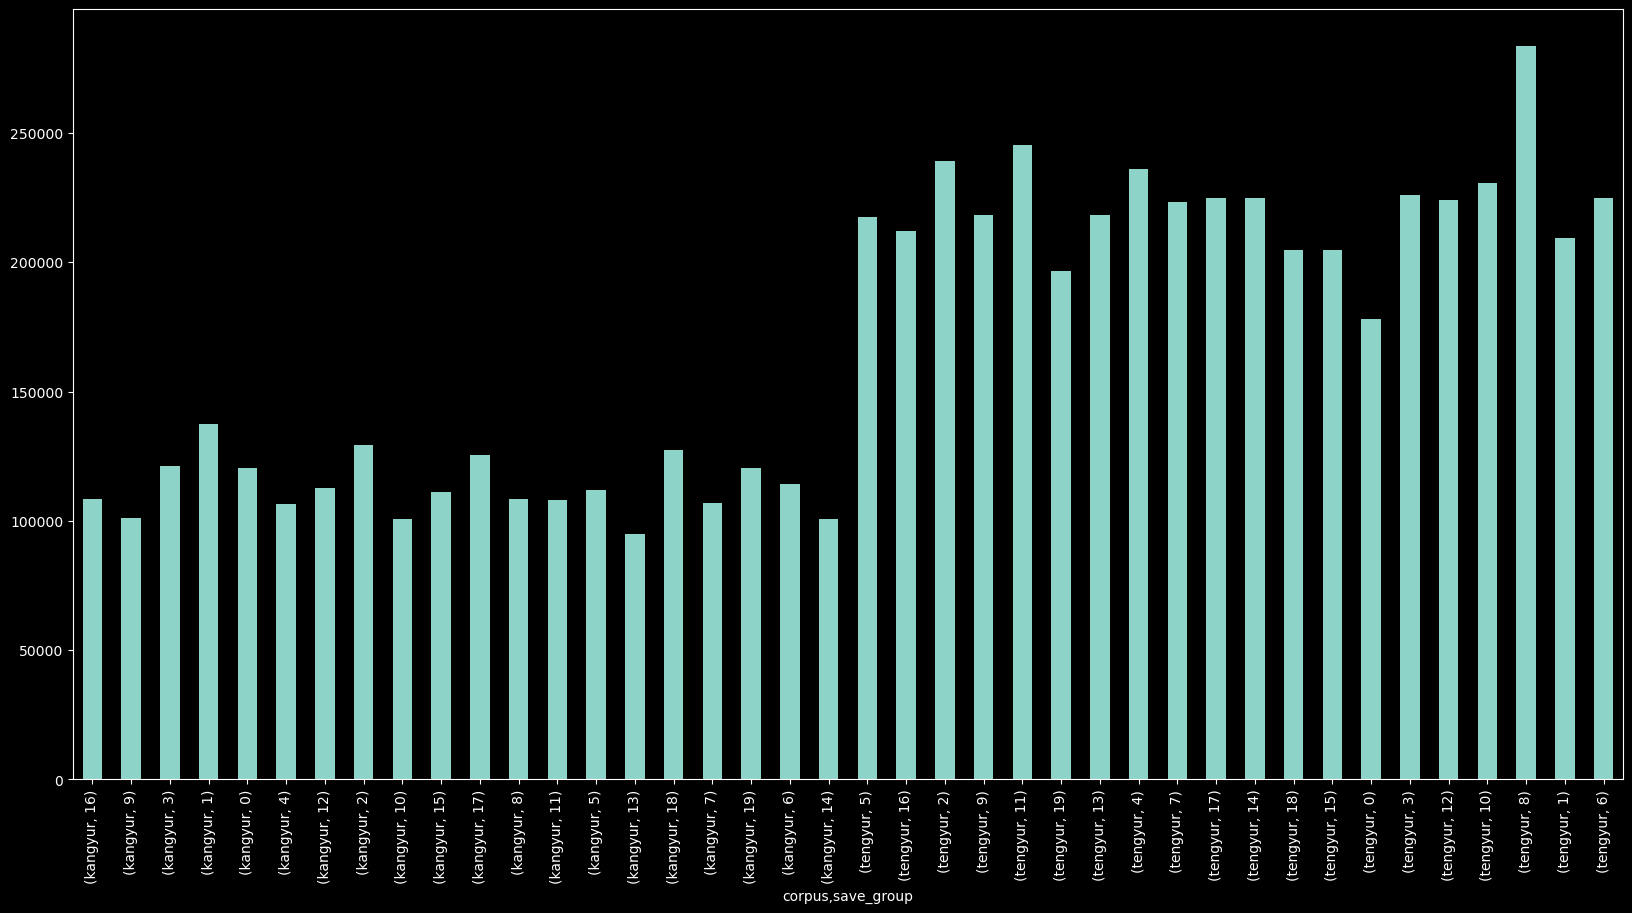

In [22]:
corpora_df.groupby(['corpus', 'save_group']).count().compute().split_text.plot(kind='bar', figsize=(20, 10))

In [23]:
corpora_df['save_group'] = 'train_' + corpora_df.corpus + corpora_df.save_group.astype(str)

In [24]:
corpora_df = corpora_df.set_index('save_group')

In [25]:
divisions = sorted(['train_kangyur' + str(i) for i in range(20)] + ['train_tengyur' + str(i) for i in range(20)])
divisions = divisions + [divisions[-1]]
# See here: https://stackoverflow.com/questions/54307559/repartition-dask-dataframe-with-custom-index

In [26]:
corpora_df = corpora_df.repartition(divisions=divisions)

In [27]:
corpora_df.npartitions

40

## Save

In [28]:
save_dir = "/home/eeisenst/workspace/temp/temp_data/bert_like_endogenous_docs"

In [29]:
import unicodedata

In [30]:
doc_start_chars = set([unicodedata.lookup(l) for l in [
    'TIBETAN MARK INITIAL YIG MGO MDUN MA',
    'TIBETAN MARK CLOSING YIG MGO SGAB MA']])
doc_start_chars

{'༄', '༅'}

In [31]:
def save_partition_to_disk(partition, save_dir):
    import os
    part_name, broken = partition.index[0], True
    with open(os.path.join(save_dir, part_name + ".txt"), mode='w', encoding='utf-8') as f:
        for _, cur_text in partition.iteritems():
            cur_text = str(cur_text)
            if len(cur_text) == 0:
                continue
            if any([c in doc_start_chars for c in cur_text]):
                if not broken:
                    f.write('\n')
                f.write('\n')
            broken = cur_text[-1] == '_'
            if broken:
                f.write(cur_text[:-1] + '\n')
            else:
                f.write(cur_text)

In [32]:
_ = corpora_df.split_text.map_partitions(save_partition_to_disk, save_dir, meta=pd.Series([None])).compute()

/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/tmp/ipykernel_15102/798054236.py:5: Futu